<!--NAVIGATION-->
< [自定义颜色条](04.07-Customizing-Colorbars.ipynb) | [目录](Index.ipynb) | [文本和标注](04.09-Text-and-Annotation.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/04.08-Multiple-Subplots.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Multiple Subplots

# 多个子图表

> Sometimes it is helpful to compare different views of data side by side.
To this end, Matplotlib has the concept of *subplots*: groups of smaller axes that can exist together within a single figure.
These subplots might be insets, grids of plots, or other more complicated layouts.
In this section we'll explore four routines for creating subplots in Matplotlib.

在一些情况中，如果能将不同的数据图表并列展示，对于我们进行数据分析和比较会很有帮助。Matplotlib提供了*子图表*的概念来实现这一点：单个图表中可以包括一组小的axes用来展示多个子图表。这些子图表可以是插图，网格状分布或其他更复杂的布局。在本节中我们会介绍Matplotlib中用来构建子图表的四个函数。

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

## ``plt.axes``: Subplots by Hand

## `plt.axes`：手动构建子图表

> The most basic method of creating an axes is to use the ``plt.axes`` function.
As we've seen previously, by default this creates a standard axes object that fills the entire figure.
``plt.axes`` also takes an optional argument that is a list of four numbers in the figure coordinate system.
These numbers represent ``[left, bottom, width, height]`` in the figure coordinate system, which ranges from 0 at the bottom left of the figure to 1 at the top right of the figure.

构建axes作为子图表的最基础方法就是使用`plt.axes`函数。正如我们前面已经看到，默认情况下，这个函数够创建一个标准的axes对象填满整个图表区域。`plt.axes`函数也可以接收一个可选的列表参数用来指定在axes在整个图表中的坐标点位置。列表中有四个数值分别为`[left, bottom, width, height]`（取值都是0-1），代表着子图表的左边、底部、宽度、高度在整个图表中左边、底部、宽度、高度所占的比例值。

> For example, we might create an inset axes at the top-right corner of another axes by setting the *x* and *y* position to 0.65 (that is, starting at 65% of the width and 65% of the height of the figure) and the *x* and *y* extents to 0.2 (that is, the size of the axes is 20% of the width and 20% of the height of the figure):

例如，我们可以在距离左边和底部65%的位置，以插图的形式放置一个宽度和高度都是20%子图表，上述数值应该为`[0.65, 0.65, 0.2, 0.2]`：

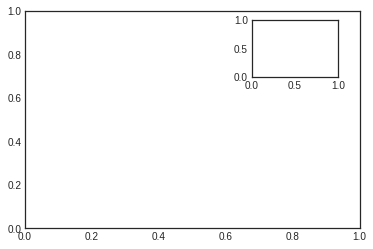

In [2]:
ax1 = plt.axes()  # 标准图表
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2]) #子图表

> The equivalent of this command within the object-oriented interface is ``fig.add_axes()``. Let's use this to create two vertically stacked axes:

与上述等价的面向对象接口的语法是`fig.add_axes()`。我们使用这个方法来创建两个垂直堆叠的子图表：

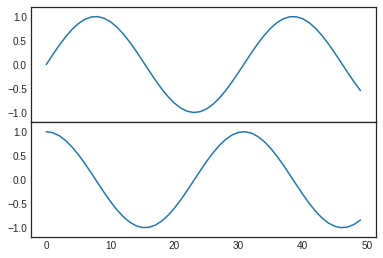

In [3]:
fig = plt.figure() # 获得figure对象
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2)) # 左边10% 底部50% 宽80% 高40%
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2)) # 左边10% 底部10% 宽80% 高40%

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

> We now have two axes (the top with no tick labels) that are just touching: the bottom of the upper panel (at position 0.5) matches the top of the lower panel (at position 0.1 + 0.4).

这样我们就有两个子图表（上面的子图表没有x轴刻度），这两个子图表正好吻合：上面图表的底部是整个图表高度50%位置，而下面图表的顶部也是整个图表的50%位置（0.1+0.4）。

## ``plt.subplot``: Simple Grids of Subplots

## `plt.subplot`：简单网格的子图表

> Aligned columns or rows of subplots are a common-enough need that Matplotlib has several convenience routines that make them easy to create.
The lowest level of these is ``plt.subplot()``, which creates a single subplot within a grid.
As you can see, this command takes three integer arguments—the number of rows, the number of columns, and the index of the plot to be created in this scheme, which runs from the upper left to the bottom right:

将子图表的行与列对齐是一个很常见的需求，因此Matplotlib提供了一些简单的函数来实现它们。这些函数当中最底层的是`plt.subplot()`，它会在网格中创建一个子图表。函数接受三个整数参数，网格行数，网格列数以及该网格子图表的序号（从左上角向右下角递增）：

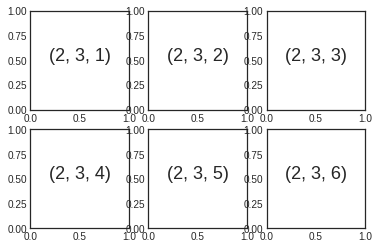

In [4]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

> The command ``plt.subplots_adjust`` can be used to adjust the spacing between these plots.
The following code uses the equivalent object-oriented command, ``fig.add_subplot()``:

`plt.subplots_adjust`函数用来调整这些子图表之间的距离。下面的代码使用了与`plt.subplot()`等价的面向对象接口方法`fig.add_subplot()`：

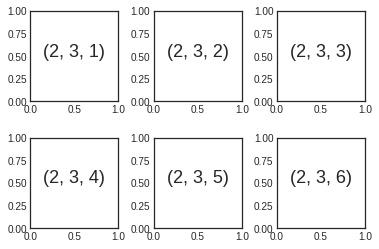

In [5]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

> We've used the ``hspace`` and ``wspace`` arguments of ``plt.subplots_adjust``, which specify the spacing along the height and width of the figure, in units of the subplot size (in this case, the space is 40% of the subplot width and height).

上例中我们指定了`plt.subplots_adjust`函数的`hspace`和`wspace`参数，它们代表这沿着高度和宽度方向子图表之间的距离，单位是子图表的大小（在本例中，距离是子图表宽度和高度的40%）。

## ``plt.subplots``: The Whole Grid in One Go

## `plt.subplots`：一句代码设置所有网格子图表

> The approach just described can become quite tedious when creating a large grid of subplots, especially if you'd like to hide the x- and y-axis labels on the inner plots.
For this purpose, ``plt.subplots()`` is the easier tool to use (note the ``s`` at the end of ``subplots``). Rather than creating a single subplot, this function creates a full grid of subplots in a single line, returning them in a NumPy array.
The arguments are the number of rows and number of columns, along with optional keywords ``sharex`` and ``sharey``, which allow you to specify the relationships between different axes.

上面的方法当我们需要创建大量的子图表网格时会变得非常冗长乏味，特别是如果我们需要将内部图表x轴和y轴标签隐藏的情况下。因此，`plt.subplots`在这种情况下是一个合适的工具（注意末尾有个s）。这个函数会一次性创建所有的网格子图表，而不是单个网格，并将它们在一个NumPy数组中返回。参数是行数和列数，还有两个可选的关键字参数`sharex`和`sharey`，可以让你指定不同子图表之间的关联。

> Here we'll create a $2 \times 3$ grid of subplots, where all axes in the same row share their y-axis scale, and all axes in the same column share their x-axis scale:

下面我们来创建一个$2 \times 3$网格的子图表，其中每一行的子图表共享它们的y轴，而每一列的子图表共享它们的x轴：

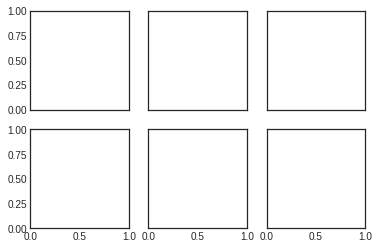

In [6]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

> Note that by specifying ``sharex`` and ``sharey``, we've automatically removed inner labels on the grid to make the plot cleaner.
The resulting grid of axes instances is returned within a NumPy array, allowing for convenient specification of the desired axes using standard array indexing notation:

注意上面我们设置了`sharex`和`sharey`之后，内部子图表的x轴和y轴的标签就自动被去掉了。返回值中ax是一个NumPy数组，里面含有每一个子图表的实例，你可以使用NumPy索引的语法很简单的获得它们：

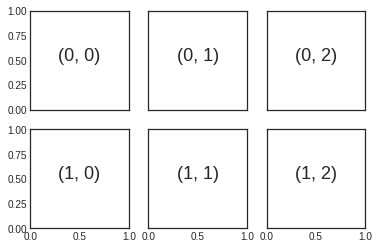

In [7]:
# axes是一个2×3的数组，可以通过[row, col]进行索引访问
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

> In comparison to ``plt.subplot()``, ``plt.subplots()`` is more consistent with Python's conventional 0-based indexing.

并且相对于`plt.subplot`，`plt.subplots()`更复合Python从0开始进行索引的习惯。

## ``plt.GridSpec``: More Complicated Arrangements

## `plt.GridSpec`：更复杂的排列

> To go beyond a regular grid to subplots that span multiple rows and columns, ``plt.GridSpec()`` is the best tool.
The ``plt.GridSpec()`` object does not create a plot by itself; it is simply a convenient interface that is recognized by the ``plt.subplot()`` command.
For example, a gridspec for a grid of two rows and three columns with some specified width and height space looks like this:

当你需要子图表在网格中占据多行或多列时，`plt.GridSpec()`正是你所需要的。`plt.GridSpec()`对象并不自己创建图表；它只是一个可以被传递给`plt.subplot()`的参数。例如，一个两行三列并带有指定的宽度高度间隔的gridspec可以如下创建：

In [8]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

> From this we can specify subplot locations and extents using the familiary Python slicing syntax:

使用这个对象我们可以指定子图表的位置和占据的网格，仅需要使用熟悉的Python切片语法即可：

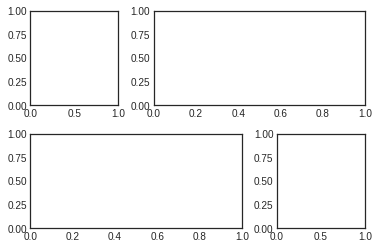

In [9]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

> This type of flexible grid alignment has a wide range of uses.
I most often use it when creating multi-axes histogram plots like the ones shown here:

这种灵活的网格对齐控制方式有着广泛的应用。作者经常在需要创建多个直方图的联合图表中使用这种方法，如下例：

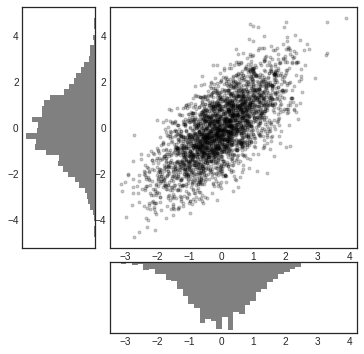

In [10]:
# 构建二维正态分布数据
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# 使用GridSpec创建网格并加入子图表
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# 在主图表中绘制散点图
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# 分别在x轴和y轴方向绘制直方图
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis() # x轴方向（右下）直方图倒转y轴方向

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis() # y轴方向（左上）直方图倒转x轴方向

> This type of distribution plotted alongside its margins is common enough that it has its own plotting API in the Seaborn package; see [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb) for more details.

这种沿着数据各自方向分布并绘制相应图表的需求是很通用的，因此在Seaborn包中它们有专门的API来实现；参见[使用Seaborn进行可视化](04.14-Visualization-With-Seaborn.ipynb)来学习更多内容。

<!--NAVIGATION-->
< [自定义颜色条](04.07-Customizing-Colorbars.ipynb) | [目录](Index.ipynb) | [文本和标注](04.09-Text-and-Annotation.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/04.08-Multiple-Subplots.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
